In [264]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.datasets import fetch_openml

In [265]:
%run homework_modules.ipynb

In [266]:
class SGD:
    def __init__(self, params, lr=0.01):
        self.params = params
        self.lr = lr

    def step(self):
        for param in self.params:
            if hasattr(param, 'weight'):
                param.weight -= self.lr * param.gradW
                if hasattr(param, 'bias'):
                    param.bias -= self.lr * param.gradb

    def zero_grad(self):
        for param in self.params:
            param.gradW.fill(0)
            if hasattr(param, 'gradb'):
                param.gradb.fill(0)

In [133]:
#pip install ucimlrepo

In [267]:
W_true = np.random.randn(3, 5).astype(np.float32) * 2
b_true = np.random.randn(3).astype(np.float32) * 5
X = np.random.rand(10000, 5).astype(np.float32) * 10

y = (X @ W_true.T + b_true + np.random.randn(10000, 3).astype(np.float32) * 0.5).astype(np.float32)

In [268]:
from ucimlrepo import fetch_ucirepo
energy_efficiency = fetch_ucirepo(id=242)

X = energy_efficiency.data.features
y = energy_efficiency.data.targets

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [270]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

In [271]:
def create_batches(X, y, batch_size=32):
    batches = []
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        batch_X = X[indices[start:end]]
        batch_y = y[indices[start:end]]
        batches.append((batch_X, batch_y))

    return batches

In [272]:
class SmallFCNN(Module):
    def __init__(self, input_dim, hidden_dim, n_output):
        super(SmallFCNN, self).__init__()
        self.fc1 = Linear(input_dim, hidden_dim)
        self.bn1 = BatchNormalization(hidden_dim)
        self.relu1 = ReLU()
        self.dropout1 = Dropout(0.1)
        self.fc2 = Linear(hidden_dim, hidden_dim)
        self.bn2 = BatchNormalization(hidden_dim)
        self.relu2 = ReLU()
        self.dropout2 = Dropout(0.1)
        self.fc3 = Linear(hidden_dim, n_output)

    def train(self):
        enable_training_layers(self, True)

    def eval(self):
        enable_training_layers(self, False)

    def forward(self, x):
        x = self.fc1.forward(x)
        x = self.bn1.forward(x)
        x = self.relu1.forward(x)
        x = self.dropout1.forward(x)
        x = self.fc2.forward(x)
        x = self.bn2.forward(x)
        x = self.relu2.forward(x)
        x = self.dropout2.forward(x)
        x = self.fc3.forward(x)
        return x

In [273]:
class MediumFCNN(Module):
    def __init__(self, input_dim, hidden_dim, n_output):
        super(MediumFCNN, self).__init__()
        self.fc1 = Linear(input_dim, hidden_dim)
        self.bn1 = BatchNormalization(hidden_dim)
        self.relu1 = ReLU()
        self.dropout1 = Dropout(0.2)
        self.fc2 = Linear(hidden_dim, hidden_dim * 2)
        self.bn2 = BatchNormalization(hidden_dim * 2)
        self.relu2 = ReLU()
        self.dropout2 = Dropout(0.2)
        self.fc3 = Linear(hidden_dim * 2, hidden_dim)
        self.bn3 = BatchNormalization(hidden_dim)
        self.relu3 = ReLU()
        self.dropout3 = Dropout(0.2)
        self.fc4 = Linear(hidden_dim, n_output)

    def forward(self, x):
        x = self.fc1.forward(x)
        x = self.bn1.forward(x)
        x = self.relu1.forward(x)
        x = self.dropout1.forward(x)
        x = self.fc2.forward(x)
        x = self.bn2.forward(x)
        x = self.relu2.forward(x)
        x = self.dropout2.forward(x)
        x = self.fc3.forward(x)
        x = self.bn3.forward(x)
        x = self.relu3.forward(x)
        x = self.dropout3.forward(x)
        x = self.fc4.forward(x)
        return x

In [274]:
def enable_training_layers(model, training=True):
    """Включает/выключает тренировочный режим для всех слоёв"""
    for layer in [model.bn1, model.bn2, model.dropout1, model.dropout2]:
        if hasattr(layer, 'training_mode'):
            layer.training_mode = training
        elif hasattr(layer, 'training'):
            layer.training = training

class BigFCNN(Module):
    def __init__(self, input_dim, hidden_dim, n_output):
        super(BigFCNN, self).__init__()
        self.fc1 = Linear(input_dim, hidden_dim)
        self.bn1 = BatchNormalization(hidden_dim)
        self.relu1 = ReLU()
        self.dropout1 = Dropout(0.1)
        self.fc2 = Linear(hidden_dim, hidden_dim)
        self.bn2 = BatchNormalization(hidden_dim)
        self.relu2 = ReLU()
        self.dropout2 = Dropout(0.1)
        self.fc3 = Linear(hidden_dim, n_output)

    def train(self):
        enable_training_layers(self, True)

    def eval(self):
        enable_training_layers(self, False)

    def forward(self, x):
        x = self.fc1.forward(x)
        x = self.bn1.forward(x)
        x = self.relu1.forward(x)
        x = self.dropout1.forward(x)
        x = self.fc2.forward(x)
        x = self.bn2.forward(x)
        x = self.relu2.forward(x)
        x = self.dropout2.forward(x)
        x = self.fc3.forward(x)
        return x

In [275]:
def train_model(model, X_train, y_train, X_val, y_val, criterion, optimizer, epochs=50, batch_size=32):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Режим обучения
        model.train()
        train_loss = 0
        for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
            outputs = model.forward(X_batch)
            loss = criterion.forward(outputs, y_batch)
            train_loss += loss

            grad = criterion.backward(outputs, y_batch)
            model.backward(X_batch, grad)
            optimizer.step()
            optimizer.zero_grad()

        # Режим оценки
        model.eval()
        val_loss = 0
        for X_batch, y_batch in create_batches(X_val, y_val, batch_size):
            outputs = model.forward(X_batch)
            val_loss += criterion.forward(outputs, y_batch)

        avg_train_loss = train_loss / len(X_train)
        avg_val_loss = val_loss / len(X_val)
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

In [276]:
input_dim = 8
hidden_dim = 128
n_output = 2
n_samples = 10000
batch_size = 32
learning_rate = 0.01
epochs=50

In [277]:
model = SmallFCNN(input_dim, hidden_dim, n_output)

In [278]:
criterion = MSECriterion()
optimizer = SGD(model.getParameters(), lr=learning_rate)

In [279]:
#train_losses = train_model(model, X, y, criterion, optimizer, epochs, batch_size)
train_losses, val_losses = train_model(
    model,
    X_train, y_train,
    X_val, y_val,
    criterion,
    optimizer,
    epochs, batch_size)

<ipython-input-265-d7bbbc716fbd>:28: RuntimeWarning: invalid value encountered in sqrt
  self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)
<ipython-input-265-d7bbbc716fbd>:19: RuntimeWarning: overflow encountered in multiply
  self.moving_mean = self.moving_mean * self.alpha + batch_mean * (1 - self.alpha)
<ipython-input-265-d7bbbc716fbd>:24: RuntimeWarning: overflow encountered in multiply
  self.moving_variance = self.moving_variance * self.alpha + batch_variance * (1 - self.alpha)
<ipython-input-265-d7bbbc716fbd>:28: RuntimeWarning: invalid value encountered in divide
  self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)


Epoch 1/50 | Train Loss: 42.0983 | Val Loss: nan
Epoch 2/50 | Train Loss: 41.4362 | Val Loss: nan
Epoch 3/50 | Train Loss: 41.9314 | Val Loss: nan
Epoch 4/50 | Train Loss: 41.6777 | Val Loss: nan
Epoch 5/50 | Train Loss: 41.8408 | Val Loss: nan
Epoch 6/50 | Train Loss: 41.7495 | Val Loss: nan
Epoch 7/50 | Train Loss: 41.7323 | Val Loss: nan
Epoch 8/50 | Train Loss: 41.4683 | Val Loss: nan
Epoch 9/50 | Train Loss: 41.7611 | Val Loss: nan
Epoch 10/50 | Train Loss: 41.5712 | Val Loss: nan
Epoch 11/50 | Train Loss: 42.4633 | Val Loss: nan
Epoch 12/50 | Train Loss: 41.6588 | Val Loss: nan
Epoch 13/50 | Train Loss: 41.4702 | Val Loss: nan
Epoch 14/50 | Train Loss: 42.1340 | Val Loss: nan
Epoch 15/50 | Train Loss: 42.0332 | Val Loss: nan
Epoch 16/50 | Train Loss: 41.3058 | Val Loss: nan
Epoch 17/50 | Train Loss: 41.5510 | Val Loss: nan
Epoch 18/50 | Train Loss: 42.4624 | Val Loss: nan
Epoch 19/50 | Train Loss: 42.5316 | Val Loss: nan
Epoch 20/50 | Train Loss: 41.9478 | Val Loss: nan
Epoch 21/

In [280]:
def plot_metrics(train_losses, val_losses):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(np.log10(train_losses), label='Train Log Loss')
    plt.plot(np.log10(val_losses), label='Validation Log Loss')
    plt.title('Logarithmic Loss')
    plt.xlabel('Epoch')
    plt.ylabel('log10(Loss)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

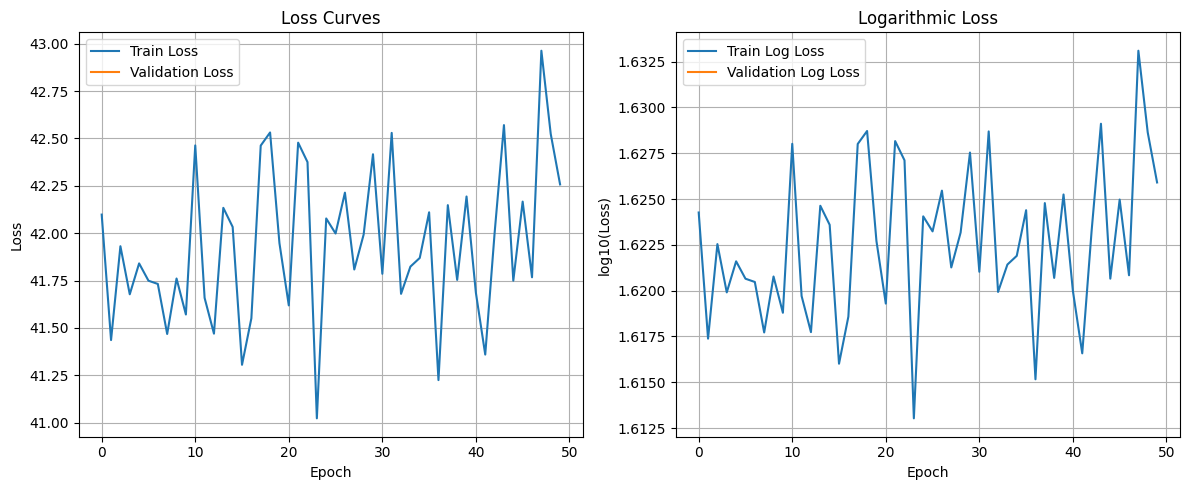

<ipython-input-265-d7bbbc716fbd>:28: RuntimeWarning: invalid value encountered in sqrt
  self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)
<ipython-input-265-d7bbbc716fbd>:28: RuntimeWarning: invalid value encountered in divide
  self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)


In [281]:
plot_metrics(train_losses, val_losses)

test_predictions = evaluate_model(model, X_test, y_test, criterion)